In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
data = pd.read_csv('^IXIC.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-09-08,2296.179932,2303.889893,2236.969971,2269.760010,2269.760010,2566300000
1,2008-09-09,2269.929932,2285.540039,2209.810059,2209.810059,2209.810059,2590590000
2,2008-09-10,2232.209961,2247.629883,2209.590088,2228.699951,2228.699951,2250360000
3,2008-09-11,2199.030029,2259.250000,2191.530029,2258.219971,2258.219971,2269670000
4,2008-09-12,2239.250000,2268.830078,2228.000000,2261.270020,2261.270020,1973590000
...,...,...,...,...,...,...,...
3268,2021-08-31,15262.879883,15278.959961,15202.669922,15259.240234,15259.240234,4170170000
3269,2021-09-01,15308.980469,15379.500000,15302.110352,15309.379883,15309.379883,4248030000
3270,2021-09-02,15358.469727,15380.070313,15285.349609,15331.179688,15331.179688,4018120000
3271,2021-09-03,15313.410156,15375.559570,15283.669922,15363.519531,15363.519531,3692170000


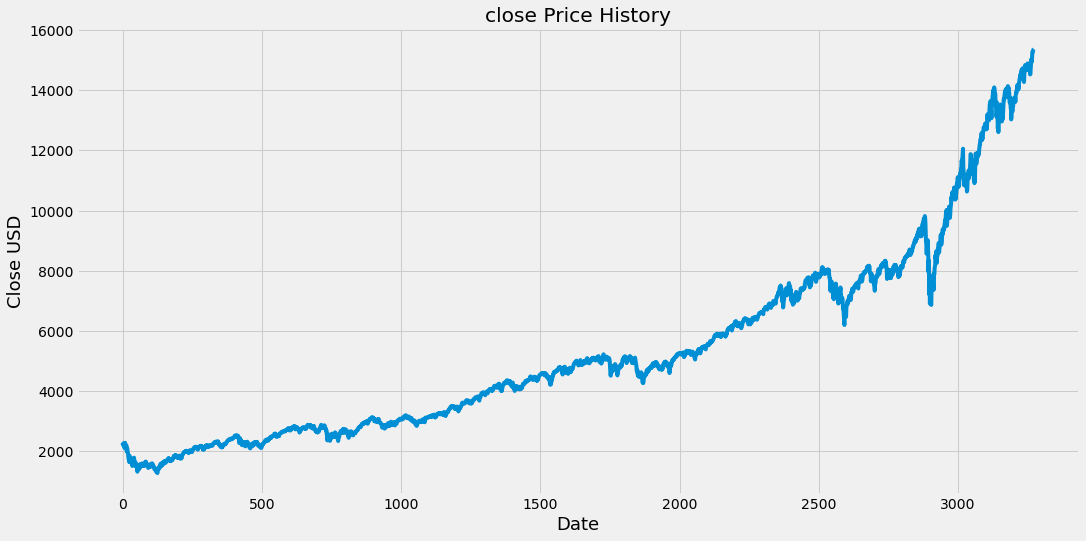

In [3]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close USD',fontsize=18)
plt.show()

In [4]:
close_data = data.filter(['Close'])
dataset = close_data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


2619

In [5]:
#Scalar the traning data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.07097278],
       [0.06672272],
       [0.06806189],
       ...,
       [0.99694092],
       [0.9992336 ],
       [1.        ]])

In [6]:
#create the traning dataset
#create the scaled traning data set
train_data = scaled_data[0:training_data_len, : ]
#split data
x_train = []
y_train = []

n = 80

for i in range(n, len(train_data)):
    x_train.append(train_data[i-n:i,0])
    y_train.append(train_data[i,0])
    if i <= n:
        print(x_train)
        print(y_train)
        print()

[array([0.07097278, 0.06672272, 0.06806189, 0.07015466, 0.07037089,
       0.064603  , 0.06658731, 0.0588564 , 0.06596346, 0.07126627,
       0.06453707, 0.06271867, 0.06288526, 0.06507516, 0.06484618,
       0.05069514, 0.05836225, 0.05676857, 0.05019818, 0.04811888,
       0.04213335, 0.03447119, 0.03343969, 0.02668994, 0.02700116,
       0.04080694, 0.03618185, 0.02549963, 0.03183608, 0.03138095,
       0.03554523, 0.0303452 , 0.0246078 , 0.02376842, 0.02009048,
       0.01682016, 0.02699832, 0.02754704, 0.03047565, 0.03206578,
       0.03244719, 0.03626054, 0.02927896, 0.024108  , 0.02685158,
       0.02467798, 0.02213717, 0.01634588, 0.02325728, 0.01759644,
       0.01512936, 0.01521585, 0.00834982, 0.00336602, 0.00820307,
       0.0144183 , 0.01390148, 0.01867757, 0.01892356, 0.00917572,
       0.01284305, 0.01586168, 0.01254246, 0.01706191, 0.02148778,
       0.01975798, 0.02104399, 0.01696053, 0.01928867, 0.01699314,
       0.0227745 , 0.02202445, 0.02011458, 0.02096175, 0.0186

In [7]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train,(x_train.shape[0],n,1) )
x_train.shape

(2539, 80, 1)

In [9]:
###Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1],1) ))
model.add(LSTM(50, return_sequences =False))
model.add(Dense(25))
model.add(Dense( 1))

In [10]:
#compile the Model
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size = 1 ,epochs =1)

2539/2539 [==============================] - 47s 18ms/step - loss: 3.5736e-04


In [12]:
#Create the testing data set
test_data = scaled_data[training_data_len - n: , : ]
#Create X_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(n, len(test_data)):
    x_test.append(test_data[i-n:i,0])
    

In [13]:
#convert data to a numpy array and reshape data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [14]:
#get predict value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [15]:
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)** 2)
rmse

209.6433598535455

<ipython-input-16-c66596e91fab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['Predictions'] = predictions


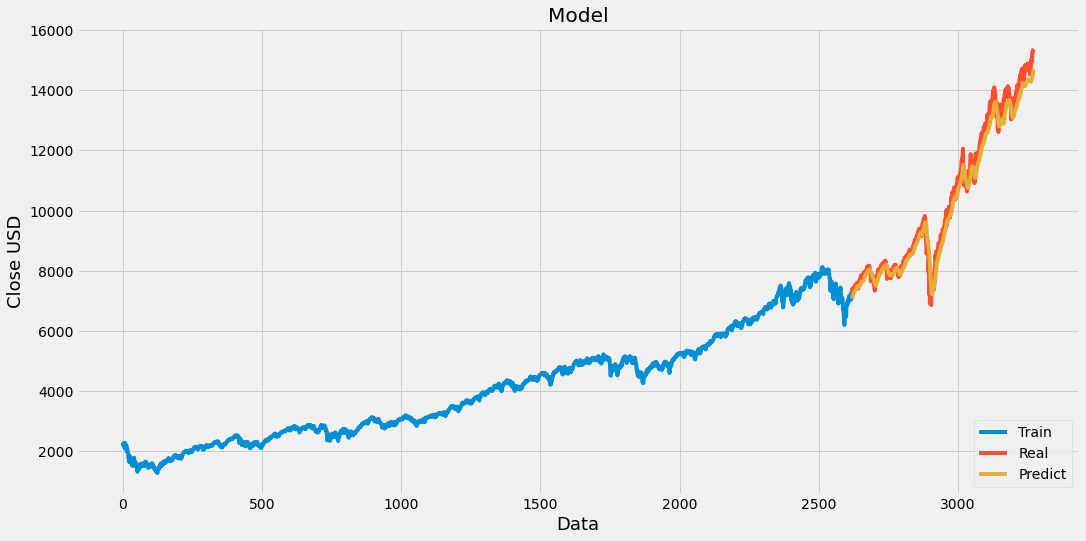

In [16]:
#Plot the data
train = close_data[:training_data_len]
real = close_data[training_data_len:]
real['Predictions'] = predictions
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize= 18)
plt.ylabel('Close USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(real[['Close','Predictions']])
plt.legend(['Train','Real','Predict'], loc = 'lower right')
plt.show()